In [74]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
import scipy.integrate as integrate
import scipy.special as special
import scipy.stats as stats
%matplotlib inline

In [229]:
r = random.choices([0,1],k=20)


In [230]:
def inwest(budget=370,margin = 140,SL=-0.05,TP=0.15,ninwest=50):
    pierwsza = random.choices([SL*margin,TP*margin],k=int(0.5*ninwest))
    druga = random.choices([SL*margin,TP*margin],k=int(0.5*ninwest))
    suma = pierwsza+druga
    budget_inwest = [(0,budget)]
    ind=0
    for p in suma:
        budget += p
        ind += 1
        new = tuple([int(ind),round(budget,2)])
        budget_inwest.append(new)
    binw = np.array(budget_inwest)
    return binw

In [231]:
curves = 5
df_inw = pd.DataFrame(inwest(),columns=["num","result_1"])
for i in range(1,curves):
    it = "result_"+str(i+1)
    inw_i = pd.DataFrame(inwest(), columns=["num", it])
    df_inw = pd.concat([df_inw,inw_i[it]], axis=1)


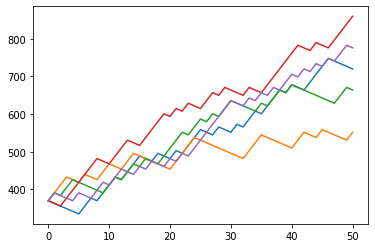

In [234]:
for h in df_inw.columns[1:]:
    plt.plot(df_inw["num"],df_inw[h], alpha= 1)

### Kolejny etap - zysk i ryzyko nie są sztywno ustalone tylko dane rozkładem Gaussa

### Etap III - Zysk i ryzyko mają ruchome średnie, zależne od strategii inwestycyjnej

Strategie inwestycyjne wpływają na podejście do ryzyka. Tutaj założymy trzy najprostsze:
- Niewzruszona - Osiągnięte zyski i straty nie wpływają na strategię
- Chciwa - Im większy zysk, tym większa skłonność do ryzyka
- Bezpieczna - Im większy zysk tym mniejsza skłonność do ryzyka

1. Niewzruszona
Take Profit posiada rozkład normalny, z wartością średnią - $\mu_{TP}$ i odchyleniem standardowym - $\sigma$. Stop Loss jest ustawiony zależnie od stosunku Zysku do Ryzyka (ZDR), tj. $\mu_{SL} = \frac{\mu_{TP}}{ZDR}$. Wartość odchylenia standardowego jest taka sama

2. Chciwa
Take 

In [329]:
# Testujemy funkcję beta jako nowe źródło TP i SL
# SL/TP_shape(0,1,2,3)
# 1,2 - alpha, beta shape factors in beta distribution
# 3,4 - loc, scale constants in beta distribution
def inwest_beta(budget=370,margin = 140,SL_shape=(1,100,0,1),TP_shape=(1,20,0.1,1),ninwest=100):
    pierwsza = random.choices([-(random.betavariate(SL_shape[0], SL_shape[1])+SL_shape[2])*SL_shape[3]*margin,
                 (random.betavariate(TP_shape[0],TP_shape[1])+TP_shape[2])*TP_shape[3]*margin], k=ninwest)
    budget_inwest = [(0,budget)]
    ind=0
    for p in pierwsza:
        budget += p
        ind += 1
        new = tuple([int(ind),round(budget,2)])
        budget_inwest.append(new)
    binw_beta = np.array(budget_inwest)
    return binw_beta

In [332]:
curves = 10
df_inw_beta = pd.DataFrame(inwest_beta(),columns=["num","result_1"])
for i in range(1,curves):
    it = "result_"+str(i+1)
    inw_i = pd.DataFrame(inwest_beta(), columns=["num", it])
    df_inw_beta = pd.concat([df_inw_beta,inw_i[it]], axis=1)

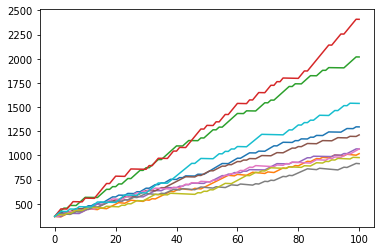

In [333]:
for h in df_inw_beta.columns[1:]:
    plt.plot(df_inw_beta["num"],df_inw_beta[h], alpha= 1)

In [298]:
# W powyższych przykładach TP jest niezależny od SL, co zwykle nie mam miejsca.
# Uzależnienie TP od SL nastąpi dopiero po określeniu strategii inwestycyjnej.

In [8]:
x_beta = []
alpha = 12
beta = 12
moda = (alpha - 1) / (alpha + beta - 2)
for x in range(1000000):
    x_beta.append(random.betavariate(alpha,beta))

Moda: 0.5


(                    0
 count  1000000.000000
 mean         0.499671
 std          0.100005
 min          0.110008
 25%          0.430386
 50%          0.499705
 75%          0.568983
 max          0.887105,
 None,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1523bcc390>]],
       dtype=object))

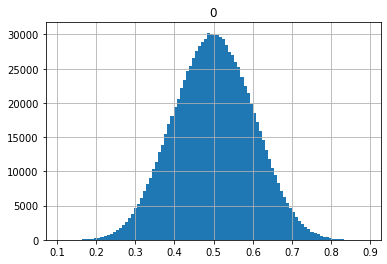

In [9]:
x_beta = pd.DataFrame(x_beta)
x_beta.describe(),print("Moda: {}".format(moda)),x_beta.hist(bins=100)

In [10]:
def integrand(a,b,x):
        B = 1 / special.beta(a,b)
        return B*(x**(a-1))*((1-x)**(b-1))
    
def integrand_norm(a,b,x):
    x_norm = np.linspace(0,1,1000)
    norm = integrate.simps(integrand(a,b,x_norm),x=x_norm)
    return np.array(integrand(a,b,x)/norm)

def frac(min=0,max=1,alpha=2,beta=2,num_pts=10000):
    x_linspace = np.linspace(min,max,num=num_pts)
    numerator = integrate.simps(integrand(alpha,beta,x=x_linspace),x=x_linspace)
    denominator = integrate.simps(integrand(alpha,beta,x=np.linspace(0,1,num=num_pts)),x=np.linspace(0,1,num=num_pts))
    return numerator/denominator

In [353]:
def frac_cumulative(min=0,max=1,alpha=2,beta=2,num_pts=100):
    x_lin = np.linspace(min,max,num=num_pts)
    result = [frac(0,f,alpha,beta) for f in x_lin]
    return np.array(result)

In [15]:
x_norm = np.linspace(0,1,1000)
norm = integrate.simps(integrand(12,12,x_norm),x=x_norm)
norm

1.0

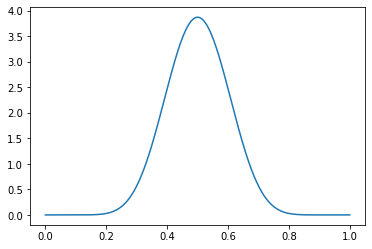

In [88]:
x_linspace = np.linspace(0,1,100000000)
plt.plot(x_linspace, integrand(12,12,x_linspace))
#plt.plot(x_linspace,[2 for _ in x_linspace],color='r')

In [89]:
x_linspace = np.linspace(0,1,10000000)
nem = list(zip(x_linspace,integrand(12,12,x_linspace)))

KeyboardInterrupt: 

In [ ]:
nems = [j[0] for j in nem if abs(0.5-j[1])<0.000001]
nems

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



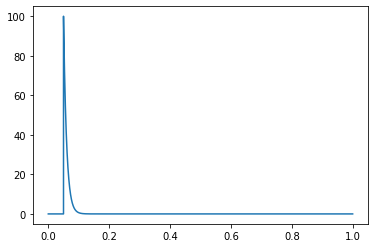

In [292]:
x_test = np.linspace(0,1,100000)
plt.plot(x_test,stats.beta.pdf(x_test,1,100,loc=0.05))

Text(0.48990741107650015, 5.2399218800657055, '$\\Delta = 0.202$')

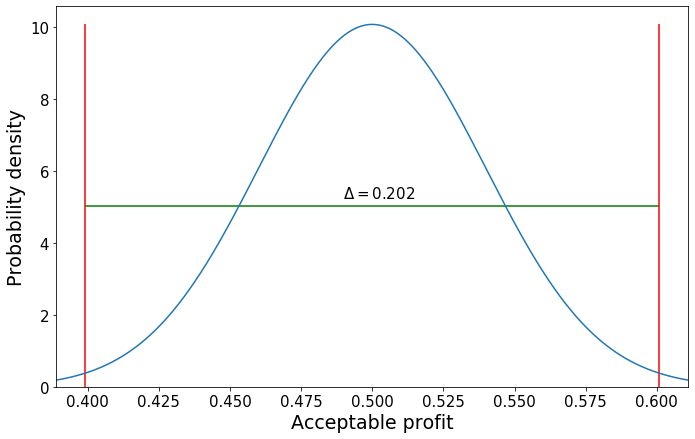

In [227]:
a = 80
b = 80
loc_test = 0
scale_test = 1
z = 0.99

interval = stats.beta.interval(z,a,b,loc=loc_test,scale=scale_test)
d_interv = interval[1] - interval[0]

x_test = np.linspace(0,(1+loc_test)*scale_test,100000)
y_test = stats.beta.pdf(x_test,a,b,loc=loc_test, scale=scale_test)
y_max = max(y_test)
z_min = interval[0]-0.05*d_interv
z_max = interval[1]+0.05*d_interv

plt.figure(figsize=(11.326,7))
plt.xlabel("Acceptable profit", size=19)
plt.ylabel("Probability density", size=19)
plt.xticks(size=15)
plt.yticks(size=15)
plt.plot(x_test, y_test)

plt.vlines(interval[0],0,y_max,color='r', linewidth=1.5)
plt.vlines(interval[1],0,y_max,color='r', linewidth=1.5)
plt.hlines(0.5*y_max,interval[0],interval[1],color='g',linewidth=1.5)
plt.axis([z_min,z_max,0,1.05*y_max])
plt.text(z_min+0.5*d_interv,0.52*y_max,"$\Delta = {:.3}$".format(d_interv), size=15)

In [145]:
1.618*7

11.326

In [348]:
# Get the intervals for a,b pairs for a,b:[2,1000]
def beta_intervals(cinv=0.999, step=1, num=10, start=2, loc=0, scale=1):
    result = []
    span = range(start,num+1,step)
    for a in span:
        for b in span:
            interval = stats.beta.interval(cinv,a,b,loc=loc,scale=scale)
            d_interv = interval[1] - interval[0]
            result.append(d_interv)
    result = np.array(result)
    return np.reshape(result, (len(span),len(span)))


In [378]:
beta_int = beta_intervals(num=1000)

Text(0.5, 1.0, 'Distribution intervals')

<Figure size 504x504 with 0 Axes>

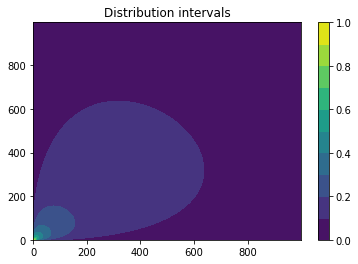

In [396]:
plt.figure(figsize=(7,7))
fig, ax = plt.subplots()
ax = plt.contourf(beta_int, levels=10)
cbar = fig.colorbar(ax)
plt.title("Distribution intervals")
#plt.xscale("log")
#plt.yscale("log")

Help on function xscale in module matplotlib.pyplot:

xscale(value, **kwargs)
    Set the x-axis scale.
    
    Parameters
    ----------
    value : {"linear", "log", "symlog", "logit", ...}
        The axis scale type to apply.
    
    **kwargs
        Different keyword arguments are accepted, depending on the scale.
        See the respective class keyword arguments:
    
        - `matplotlib.scale.LinearScale`
        - `matplotlib.scale.LogScale`
        - `matplotlib.scale.SymmetricalLogScale`
        - `matplotlib.scale.LogitScale`
    
    
    Notes
    -----
    By default, Matplotlib supports the above mentioned scales.
    Additionally, custom scales may be registered using
    `matplotlib.scale.register_scale`. These scales can then also
    be used here.



TypeError: 'column' is an invalid keyword argument for array()

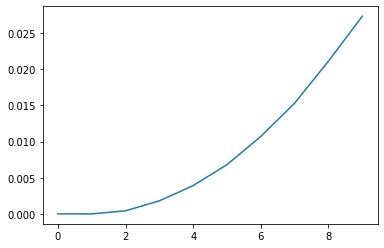